In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#imported all required packages
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.functions import year, hour, desc
from pyspark.sql import functions as F
from pyspark.sql.functions import col , to_timestamp
import datetime as dt

In [3]:
# Create a SparkSession
sparkSession = SparkSession.builder.appName("myAppName").getOrCreate()


In [4]:
#created the schema
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, BooleanType, TimestampType

crime_schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", BooleanType(), True),
    StructField("Domestic", BooleanType(), True),
    StructField("Beat", StringType(), True),
    StructField("District", StringType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("Community Area", IntegerType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", DoubleType(), True),
    StructField("Y Coordinate", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", TimestampType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])


In [5]:
#imported all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [6]:
chicago_crime_df = sparkSession.read.format("csv") \
    .option("header", True) \
    .option("delimiter", ",") \
    .schema(crime_schema) \
    .load("Crimes_-_2001_to_Present.csv")

# Show the first few rows of the DataFrame
chicago_crime_df.show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|

In [7]:
#checking number of rows and columns
print("total Number of rows:", chicago_crime_df.count())
print("total Number of columns:", len(chicago_crime_df.columns))


total Number of rows: 154620
total Number of columns: 22


In [8]:
# Checking the type of chicago_crime_df
type(chicago_crime_df)

pyspark.sql.dataframe.DataFrame

In [9]:
#Checking number of nulls in dataframe column-wise
from pyspark.sql.functions import isnan, when, count, col

chicago_crime_df.select([
    count(when(col(c).isNull(), c)).alias(c)
    for c in chicago_crime_df.columns
]).show()

+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|          0|   0|    0|   0|           0|          0|                 431|     0|       0|   0|       0|   5|             5|       1|        3014|        3014|   1|    154620|    3014|     3014|    3014|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+

In [10]:
# substituting null values
fill_values = {c: 0 if t in ("integer", "double") else "" for c, t in chicago_crime_df.dtypes}
chicago_crime_df = chicago_crime_df.na.fill(fill_values)
chicago_crime_df.show()


+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|

In [11]:
#after filling null valus, again Checking number for nulls in dataframe column-wise
from pyspark.sql.functions import isnan, when, count, col

chicago_crime_df.select([
    count(when(col(c).isNull(), c)).alias(c)
    for c in chicago_crime_df.columns
]).show()


+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|          0|   0|    0|   0|           0|          0|                   0|     0|       0|   0|       0|   5|             5|       0|           0|           0|   1|    154620|       0|        0|       0|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+

In [12]:
#checking for null values and NaN values in columns of type double or float, and only null values in other columns.
chicago_crime_df.select([
    count(when(col(c).isNull() | (col(c).cast("string") == "nan"), c)).alias(c)
    if t in ("double", "float") else
    count(when(col(c).isNull(), c)).alias(c)
    for c, t in chicago_crime_df.dtypes
]).show()


+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|          0|   0|    0|   0|           0|          0|                   0|     0|       0|   0|       0|   5|             5|       0|           0|           0|   1|    154620|       0|        0|       0|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+

In [13]:
# changed Date column data type to TimestampType using cast method
from pyspark.sql.functions import to_timestamp
chicago_crime_df.printSchema()
chicago_crime_df = chicago_crime_df.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))
chicago_crime_df.printSchema()
chicago_crime_df.show()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = false)
 |-- Date: string (nullable = false)
 |-- Block: string (nullable = false)
 |-- IUCR: string (nullable = false)
 |-- Primary Type: string (nullable = false)
 |-- Description: string (nullable = false)
 |-- Location Description: string (nullable = false)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = false)
 |-- District: string (nullable = false)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = false)
 |-- X Coordinate: double (nullable = false)
 |-- Y Coordinate: double (nullable = false)
 |-- Year: integer (nullable = true)
 |-- Updated On: timestamp (nullable = true)
 |-- Latitude: double (nullable = false)
 |-- Longitude: double (nullable = false)
 |-- Location: string (nullable = false)

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = false

In [24]:
# filter data for the last ten years
chicago_crime_df = chicago_crime_df.filter((chicago_crime_df["Year"] >= 2013))
chicago_crime_df.show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|             BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     

In [15]:
from pyspark.sql.functions import when, col

# print distinct values of Primary Type
print("before merging")
chicago_crime_df.select("Primary Type").distinct().orderBy("Primary Type").show(truncate=False)

# remove specified crime types
crime_types = ["NON-CRIMINAL (SUBJECT SPECIFIED)", "OTHER OFFENSE", "STALKING"]
chicago_crime_df = chicago_crime_df.filter(~col("Primary Type").isin(crime_types))

# merge similar crime types
chicago_crime_df = chicago_crime_df.withColumn(
    "Primary Type",
    when(
        col("Primary Type").isin("CRIMINAL DAMAGE", "CRIMINAL TRESPASS"),
        "CRIMINAL DAMAGE/TRESPASS"
    ).when(
        col("Primary Type").isin("MOTOR VEHICLE THEFT", "THEFT"),
        "MOTOR VEHICLE/OTHER THEFT"
    ).otherwise(col("Primary Type"))
)

# print distinct values of Primary Type after merging
print("\nafter merging ")
chicago_crime_df.select("Primary Type").distinct().orderBy("Primary Type").show(truncate=False)

# show the DataFrame
chicago_crime_df.show()


before merging
+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
+---------------------------------+
only showing top 20 rows


after merging 
+---------------------------------+
|Primary Type                     |
+------

In [16]:
# filter out records with null year values in Date column
chicago_crime_df = chicago_crime_df.filter(year("Date").isNotNull())

# group the data by year and count the number of crimes
yearly_crime_count = chicago_crime_df.groupBy(year("Date").alias("Year")).agg(count("*").alias("Crimes"))

# show the yearly crime count
yearly_crime_count.show()


+----+------+
|Year|Crimes|
+----+------+
|2018|   736|
|2015|114808|
|2013|   263|
|2014|   615|
|2019|  1121|
|2020|   646|
|2016| 24655|
|2017|   987|
|2021|    39|
+----+------+



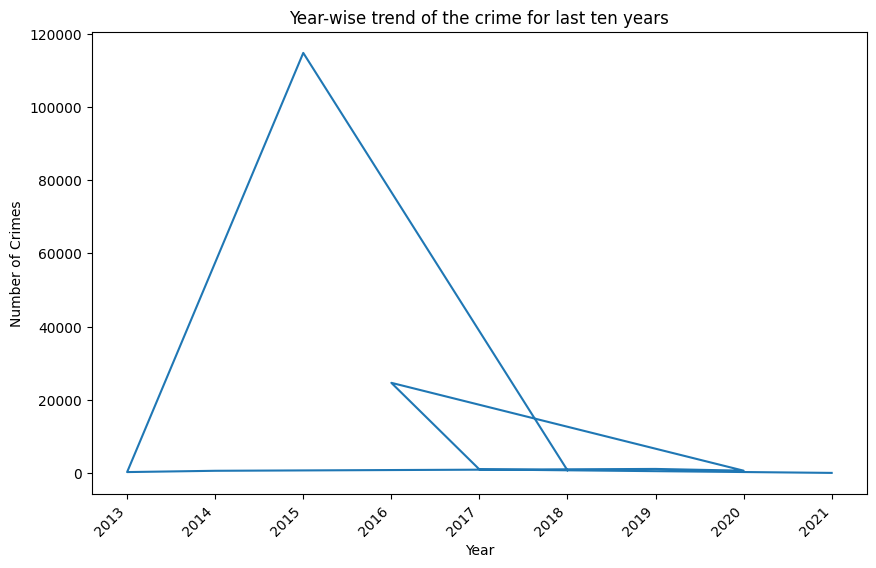

In [17]:
# convert the DataFrame to a pandas DataFrame
yearly_crime_count_pandas = yearly_crime_count.toPandas()


# plot a bar chart of the top ten crimes
plt.figure(figsize=(10, 6))
plt.plot(yearly_crime_count_pandas["Year"], yearly_crime_count_pandas["Crimes"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Year-wise trend of the crime for last ten years")
plt.show()



In [18]:
#group the data by hour and count the number of crimes
hourly_crime_count = chicago_crime_df.groupBy(hour("Date").alias("Hour")).agg(count("*").alias(
"CrimeCount")).orderBy("Hour")

In [19]:
# show the hourly crime count
hourly_crime_count.show()

+----+----------+
|Hour|CrimeCount|
+----+----------+
|   0|      7314|
|   1|      4313|
|   2|      3879|
|   3|      3271|
|   4|      2460|
|   5|      2181|
|   6|      2505|
|   7|      3416|
|   8|      4983|
|   9|      6423|
|  10|      6025|
|  11|      6326|
|  12|      8218|
|  13|      6883|
|  14|      7030|
|  15|      7690|
|  16|      7659|
|  17|      7731|
|  18|      8477|
|  19|      8176|
+----+----------+
only showing top 20 rows



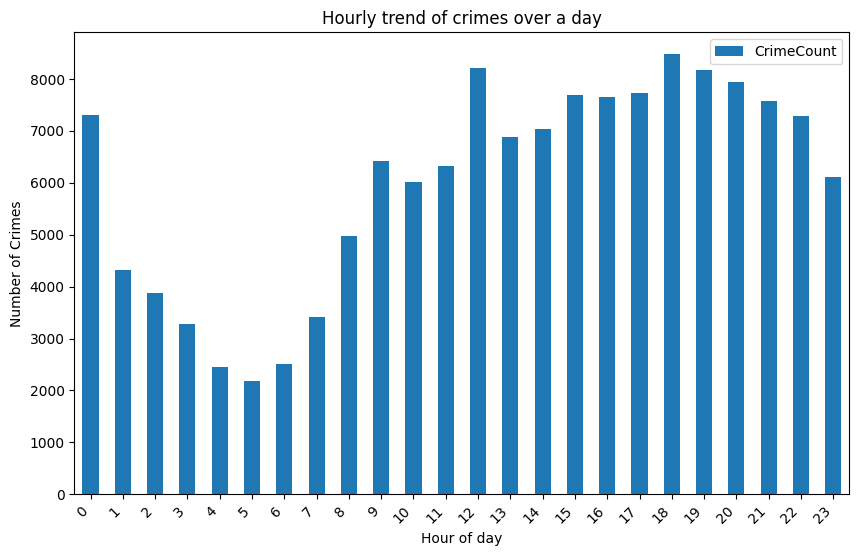

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the DataFrame to a pandas DataFrame
hourly_crime_count_pandas = hourly_crime_count.toPandas()

# plot a bar chart of the hourly crime count
hourly_crime_count_pandas.plot(kind="bar", x="Hour", y="CrimeCount", figsize=(10, 6))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Hour of day")
plt.ylabel("Number of Crimes")
plt.title("Hourly trend of crimes over a day")

plt.show()


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import desc

# group the data by primary type and count the number of crimes
top_crimes = chicago_crime_df.groupBy("Primary Type").agg(count("*").alias("CrimeCount")).orderBy(desc("CrimeCount"))

# convert the DataFrame to a pandas DataFrame
top_crimes_df = top_crimes.limit(10).toPandas()


top_crimes_df

,Primary Type,CrimeCount
0,MOTOR VEHICLE/OTHER THEFT,40962
1,BATTERY,27947
2,CRIMINAL DAMAGE/TRESPASS,21090
3,NARCOTICS,10944
4,DECEPTIVE PRACTICE,10194
5,ASSAULT,9599
6,BURGLARY,8555
7,ROBBERY,6514
8,WEAPONS VIOLATION,1873
9,OFFENSE INVOLVING CHILDREN,1312


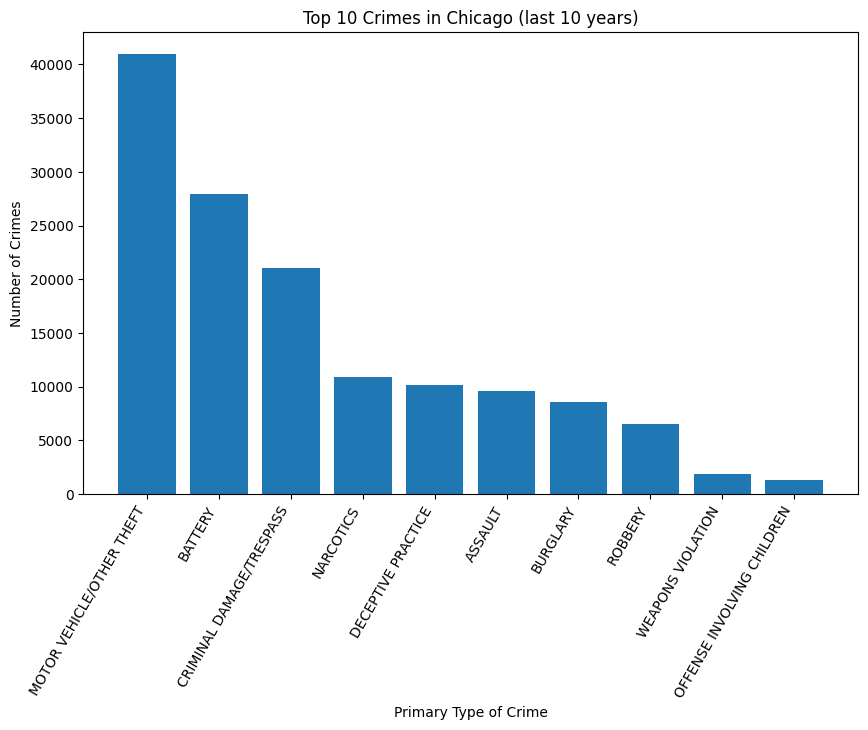

In [22]:
# plot a bar chart of the top ten crimes
plt.figure(figsize=(10, 6))
plt.bar(top_crimes_df["Primary Type"], top_crimes_df["CrimeCount"])
plt.xticks(rotation=60, ha="right")
plt.xlabel("Primary Type of Crime")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Crimes in Chicago (last 10 years)")
plt.show()